In [ ]:
import cvxpy as cp
import numpy as np

## **Least-squares**

In a least-squares, or linear regression, problem, we have measurements $A \in {R}^{m \times n}$ and $b \in {R}^{m}$ and seek a vector $x \in {R}^{n}$ such that $Ax$ is close to $b$. Closeness is defined as the sum of the squared differences:


$$ \sum_{i=1}^{m}(a_{i}^{T}x-b_{i})^{2} $$

also known as the $\ell_2$-norm squared, $\|Ax-b\|_2^2$.

For example, we might have a dataset of $m$ users, each represented by $n$ features. Each row $a_i^T$ of $A$ is the features for user $i$, while the corresponding entry $b_i$ of $b$ is the measurement we want to predict from $a_i^T$, such as ad spending. The prediction is given by $a_i^T x$

We find the optimal $x$ by solving the optimization problem

$$ \text{minimize } \|Ax-b\|_2^2.$$

> Let $x^*$ denote the optimal $x$. The quantity $r = Ax^* - b$ is known as the residual. If $\|r\|_2 = 0$, we have a perfect fit.

In [ ]:
m = 3
n = 2
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

In [ ]:
A

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]])

In [ ]:
A.shape , b.shape

((3, 2), (3,))

In [ ]:
# Construct the problem.
x = cp.Variable(n)

In [ ]:
# *, +, -, / are overloaded to construct CVXPY objects.
cost = cp.sum_squares(A @ x - b)  #cp.norm2(A @ x - b)**2
objective = cp.Minimize(cost)

In [ ]:
# <=, >=, == are overloaded to construct CVXPY constraints.
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)


In [ ]:
# The optimal objective is returned by prob.solve().
result = prob.solve()

In [ ]:
# The optimal value for x is stored in x.value.
print(x.value)
# The optimal Lagrange multiplier for a constraint
# is stored in constraint.dual_value.
print(constraints[0].dual_value)

[1.         0.21015949]
[0. 0.]


-----------------------------------------------------------

## Linear program

A linear program is an optimization problem with a linear objective and affine inequality constraints. A common standard form is the following:

$$
\begin{array}{ll} \mbox{maximize} & c^Tx\\
\mbox{subject to} & Ax \leq b
\end{array}
$$

Here  $A \in {R}^{m \times n}$ , $b \in {R}^{m}$ and $c \in {R}^{n}$ are problem data and $x \in {R}^{n}$
is the optimization variable. The inequality constraint $Ax \leq b$ is elementwise.

For example, we might have $n$ different products, each constructed out of $m$ components. Each entry $A_ij$ is the amount of component
 required to build one unit of product $j$. Each entry $b_i$  is the total amount of component $i$ available. We lose $c_j$  for each unit of product $j$($c_j < 0$ indicates profit). Our goal then is to choose how many units of each product $j$ to make, $x_j$  in order to minimize loss without exceeding our budget for any component.



In [ ]:
m = 3
n = 2
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)
c = np.random.randn(n)

x = cp.Variable(n)


In [ ]:
prob = cp.Problem(cp.Minimize(c.T@x),[A @ x <= b])

In [ ]:

prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)



The optimal value is 0.0907327728184005
The optimal x is
[0.97672897 0.22864252]


In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial linear program.
m = 15
n = 10
np.random.seed(1)
s0 = np.random.randn(m)
lamb0 = np.maximum(-s0, 0)
s0 = np.maximum(s0, 0)
x0 = np.random.randn(n)
A = np.random.randn(m, n)
b = A @ x0 + s0
c = -A.T @ lamb0

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A @ x <= b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)


The optimal value is -15.220912604404832
A solution x is
[-1.1015836  -0.16207264 -0.90072437  0.03042621  0.61108486 -1.13141957
  1.1270734   0.87833368  0.48871908  0.89807117]
A dual solution is
[2.45894208e-09 6.11756417e-01 5.28171745e-01 1.07296862e+00
 6.38551602e-09 2.30153871e+00 1.12756160e-09 7.61206895e-01
 1.31943038e-08 2.49370376e-01 2.02551464e-09 2.06014070e+00
 3.22417209e-01 3.84054335e-01 2.94504008e-09]


-----------------------------------------------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import cvxpy as cp

In [ ]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [ ]:
plt.scatter(X, y)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)


In [ ]:
w_sklearn = lin_reg.coef_[0][0]
b_sklearn = lin_reg.intercept_[0]

In [ ]:
w = cp.Variable(1)
b = cp.Variable(1)
objective = cp.Minimize(cp.sum_squares(y - (w * X + b)))
problem = cp.Problem(objective)
problem.solve()



80.65845639670532

In [ ]:
w_cvxpy = w.value[0]
b_cvxpy = b.value[0]

In [ ]:
comparison = {
    "Sklearn (w, b)": (w_sklearn, b_sklearn),
    "CVXPY (w, b)": (w_cvxpy, b_cvxpy),
}

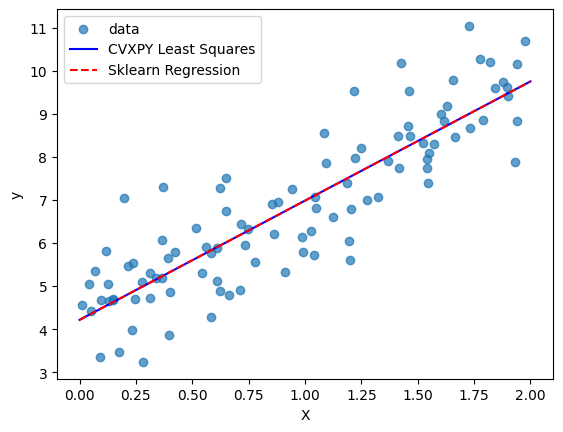

In [ ]:
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
y_sklearn_pred = w_sklearn * X_plot + b_sklearn
y_cvxpy_pred = w_cvxpy * X_plot + b_cvxpy

plt.scatter(X, y, label="data", alpha=0.7)
plt.plot(X_plot, y_cvxpy_pred, "b-", label="CVXPY Least Squares")

plt.plot(X_plot, y_sklearn_pred, "r--", label="Sklearn Regression")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()